<a href="https://colab.research.google.com/github/hamid-hassani/Introduction-astropy-playground/blob/master/Astronomy_Data_Analysis_Python_E01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello there!

Login with your Google account and make copy of this file to start!


In [0]:
#Install dependencies
#Pip is some kind of pacakge manager.

!pip install astropy==3.2.3


#Wget, Download data from http protocol directly into your host (Google Colab for here).

##Some useful tips:
#-c (flag or option) in order to resume download leter, if you want.
#-O (flag or option) to change name of downloaded file.
!wget -c -O smc_170_231.fits 'http://gleam-vo.icrar.org/GLEAMCUTOUT?radec=13.15833,-72.80028&radius=2.5&file_id=mosaic_Week2_170-231MHz.fits&regrid=0&projection=ZEA&fits_format=1'
!wget -c -O smc_mips_24.fits 'https://irsa.ipac.caltech.edu//data/SPITZER/SAGE-SMC/images/MIPS/SAGE_SMC_MIPS24_E012.fits'


#Some of data archive let you download by bash files, like ALMA and ESO (MUSE for instance).


     |████████████████████████████████| 6.3MB 3.4MB/s 
  Found existing installation: astropy 4.0.1
    Uninstalling astropy-4.0.1:
      Successfully uninstalled astropy-4.0.1
--2020-04-01 21:30:39--  http://gleam-vo.icrar.org/GLEAMCUTOUT?radec=13.15833,-72.80028&radius=2.5&file_id=mosaic_Week2_170-231MHz.fits&regrid=0&projection=ZEA&fits_format=1
Resolving gleam-vo.icrar.org (gleam-vo.icrar.org)... 13.54.25.105
Connecting to gleam-vo.icrar.org (gleam-vo.icrar.org)|13.54.25.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1693440 (1.6M) [image/fits]
Saving to: ‘smc_170_231.fits’

smc_170_231.fits    100%[===================>]   1.61M  1.36MB/s    in 1.2s    

2020-04-01 21:30:41 (1.36 MB/s) - ‘smc_170_231.fits’ saved [1693440/1693440]

--2020-04-01 21:30:42--  https://irsa.ipac.caltech.edu//data/SPITZER/SAGE-SMC/images/MIPS/SAGE_SMC_MIPS24_E012.fits
Resolving irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.110
Connecting to irsa.ipac.caltech.edu (

More information about GLEAM project (Low-frequncy inteformetery radio data from ~ 70MHz to 230MHz)

http://www.mwatelescope.org/gleam


---

Spitzer data:
https://irsa.ipac.caltech.edu/cgi-bin/Radar/nph-discovery

MIPS:
24um,70um,160um



---

[DS9 Image viewer
](http://ds9.si.edu/site/Download.html)

In [0]:
#DOC: https://docs.astropy.org/en/stable/io/fits/
#Import astropy
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt


#Open FITS file:
hdu = fits.open('smc_170_231.fits')
mips_24 = fits.open('smc_mips_24.fits')

#An HDU (Header Data Unit) consist of a header and (typically) a data array or table.

#Check our HDU information, slices and cube:
print(hdu.info())
print(mips_24.info())

Filename: smc_170_231.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      67   (649, 649)   float32   
None
Filename: smc_mips_24.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      58   (14676, 9130)   float32   
None



![alt text](http://astronomy.swin.edu.au/cms/cpg15x/albums/userpics/rightascension2.gif)

Read here more:
*  http://astronomy.swin.edu.au/cosmos/R/Right+Ascension
*  http://astronomy.swin.edu.au/cosmos/D/Declination



In [0]:
#get header of our hdu
header = hdu[0].header

#Print unformatted header
#print(header))

#print formatted header
#print(repr(header))

#Get specfiec header 'keyword' using:
#print(header['NAXIS1'])

#General information:
print('Image X length: ',header['NAXIS1'])  
print('Image Y length: ',header['NAXIS1'])
print('Cordinate: ',header['EQUINOX']) # EQUINOX, Can be J2000.0 or B1950 (modern data are J2000) or etc. J2000 refred as fk5 in astropy.
print('Astrometric system: ', header['RADESYS'])
print('X: ',header['CTYPE1']) # X axes in Astronomy expressed as WCS projection, right ascension
print('Y: ',header['CTYPE2']) # Y axes in Astronomy expressed as WCS projection, declination
print('Physical Unit: ', header['BUNIT']) # Physical Unit (Maybe Jy, Jy/Beam, erg/s*cm^2, Jy/str or etc.)


print('Pixel Size: ',header['CD1_1']) #Pixel size in deg, *3600=arcsec
print('Pixel Size: ',header['CD2_2']) #Pixel size in deg, *3600=arcsec
#if CD1_1=CD2_2, you have squre pixesl.

#Radio maps necessary information (May specific for other maps even):
print('Beam Major: ',header['BMAJ']) #Beam major axes (FWHM) in deg
print('Beam Minor: ',header['BMIN']) #Beam major axes (FWHM) in deg
print('BPA: ',header['BPA']) #Position angle in deg





Image X length:  649
Image Y length:  649
Cordinate:  2000.0
Astrometric system:  ICRS
X:  RA---ZEA
Y:  DEC--ZEA
Physical Unit:  JY/BEAM
Pixel Size:  -0.007696780841798
Pixel Size:  0.007696780841798
Beam Major:  0.04909602925181389
Beam Minor:  0.04571897909045219
BPA:  31.97131729125977


Read more about beam size:

[Check here](https://science.nrao.edu/BasicsofRASocorroSynthesisWorkshoptalkfinmod5.pdf)


In [0]:
#Update header (You may need to enter specific key)
#You must explain any action as comment for your further studies.

# Set new values:
header['history'] = 'I am working on this GLEAM data today!'
header['history'][1] = 'I am working on this GLEAM data today!'


#Another way of updating old values:
header.set('BMAJ', 0.09097557515)

#Always works with 'key' rather than position index, becuase all FITS file do not follow same index order.

#get all keys:
#print(list(header.keys()))

In [0]:
#Working with image data, Get data as 2x2 array
data = hdu[0].data

#Get indvisual px value:
#data[y,x], astropy load data such as [y,x] and like C (and unlike Fortran), Python is 0-indexed.
print(data[100, 100])

#Get array of px:
print(data[100:102, 100:102])

#Get mean of this 4 pixels:
print('4 Pixel sum: ',np.sum(data[100:102, 100:102]))
print('4 Pixel mean: ',np.mean(data[100:102, 100:102]))


#Update px values:

#First way:
#data[30:40, 10:20] = 100
#data[1, 4]=0

#Condition in data:
#data[data<0.1]=0

#Rmove NaN in data, NaN represnt lack of data, not zero.
#data[np.isnan(data)] = 0


#Second way (slower), Loop:
total_x = int(header['NAXIS1']) #X-AXES
total_y = int(header['NAXIS2']) #Y-AXES

for x in range(0,total_x):
  for y in range(0,total_y):
      if(data[y,x]<0.01):
        data[y,x]=0
        #data[y,x]=np.nan


print('Sum of data:',np.sum(data))
print('Mean of data:',np.mean(data))
print('STD of data:',np.std(data))

0.021854168
[[0.02185417 0.02278217]
 [0.01820427 0.02301056]]
4 Pixel sum:  0.08585118
4 Pixel mean:  0.021462794
Sum of data: 10200.767
Mean of data: 0.024218287
STD of data: 0.06882086


In [0]:
#Save fits:
#do what ever change you want and save FITS as:

#for example:
#data[data<10]=0

hdu.close() #hdu is your file HDU name
fits.writeto('new_map.fits',data,header,clobber=True)



WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---ZEA'  'DEC--ZEA'  
CRVAL : 60.0  -27.0  
CRPIX : -1463.5  6616.5  
CD1_1 CD1_2  : -0.007696780841798  0.0  
CD2_1 CD2_2  : 0.0  0.007696780841798  
NAXIS : 649  649


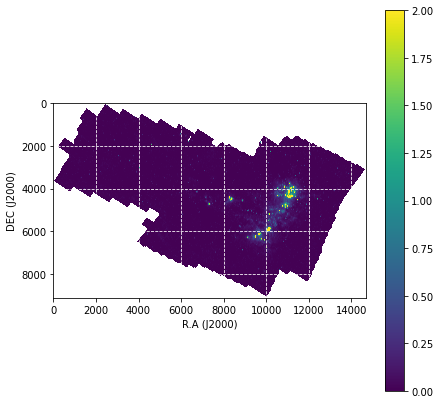

In [0]:
#DOC: https://docs.astropy.org/en/stable/visualization/
#Data visualization:

import matplotlib.pyplot as plt
from astropy.wcs import WCS

#recall MIPS 24um header and data again:
mips_24_header=mips_24[0].header
data_24 = mips_24[0].data

#Perform coordinate transforamtion:
wcs = WCS(header)

#Check WCS:
print(repr(wcs))

#CTYPE: Projection system
#CRVAL: Refrence point (RA,DEC)
#CRPIX: Refrence point(X,Y)
#CD1_1,CD1_2,CD2_1,CD2_2: Pixel Size in deg
#NAXIS: Length of image in PX.

fig, ax = plt.subplots(figsize=(7,7))
#Show map in World Coordinate System transform from axes
#plt.subplot(projection=wcs)

plt.subplot()

plt.imshow(data_24, vmin=0, vmax=2)
#plt.imshow(data_24[3000:7000,7000:13000], vmin=0, vmax=2)
#plt.imshow(data, vmin=0, vmax=0.3) 

plt.grid(color='white', ls='dashed')
plt.xlabel('R.A (J2000)')
plt.ylabel('DEC (J2000)')
plt.colorbar()

#You may write in your python codes when you do not use Jupyter Notebook:
#plt.show() 

In [0]:
#Doc: https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html
#Sky transformation, Skycoord
#How to get RA and DEC from x and y and inverse.

from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # coordinates systems
from astropy.coordinates import Angle
import astropy.units as u #physical unit

# We had a R.A and DEC from j1950 (fk4) before:
ra= '00:43:33'
dec= '-73:39:11'

# Convert above cordinate to j2000(fk5) using SkyCoord
# You need to define your input unit also:
c = SkyCoord( ra, dec, unit=(u.hourangle, u.deg),frame='fk4')
fk5 = c.transform_to('fk5')

new_ra = fk5.ra.deg  #you can get with differnt unit as well, change it to .hourangle
new_dec = fk5.dec.deg

print('Transformed cordinate to J2000: ',new_ra,new_dec)

#Get x and y of this new RA and DEC:
#World 2 pix mean transform from astronomical cordinate to x and y
x, y = wcs.all_world2pix(new_ra, new_dec, 1)

print('X and Y from above RA and DEC: ',x,y)

#Now reverse, Convert from x and y into ra and dec:
my_x = 100
my_y = 100

my_ra,my_dec = wcs.all_pix2world(my_x, my_y, 1)
print('Convert from arbitrary X and Y to Ra and DEC: ',my_ra,my_dec)




Transformed cordinate to J2000:  11.346755021362636 -73.37978034109875
X and Y from above RA and DEC:  321.7431502252782 231.3585647601567
Convert from arbitrary X and Y to Ra and DEC:  13.03023848122826 -75.13330388711006


In [0]:
#Angular sepration from 2 sources:

#Need to enter 2 different source/point even with different coordinate system:
c1 = SkyCoord('5h23m34.5s', '-69d45m22s', frame='icrs')
c2 = SkyCoord('0h52m44.8s', '-72d49m43s', frame='fk5')
sep = c1.separation(c2)

#only can expressed as angular speration(deg,radian)
print('Angular Speration:', sep.deg)

#Compute physical distance of 2 sources:
cc1 = SkyCoord('5h23m34.5s', '-69d45m22s', distance=70*u.kpc, frame='icrs')
cc2 = SkyCoord('0h52m44.8s', '-72d49m43s', distance=80*u.kpc, frame='icrs')
sep_3d = cc1.separation_3d(cc2)

# Get distance of this source to each other respect to earth:  
print('Phyical distance:',sep_3d.pc)

Angular Speration: 20.746114476043978
Phyical distance: 28743.9881578141


How to find information about our celestial source?

[Check here](http://simbad.u-strasbg.fr/simbad/sim-fbasic)

In [0]:
#DOC: https://reproject.readthedocs.io/
#Change image shape (Remove extra space, crop)

#As you can see in MIPS 24um image, there are a lot's of extra space.
#How we can remove extra regions which is not from our source?


#we need to use reproject package:
!pip install reproject

from reproject import reproject_interp


new_header = mips_24_header.copy()   

new_header['NAXIS1'] = 6000 # total lenght of new map(x)
new_header['NAXIS2'] = 6000 # total lenght of new map(y)

new_header['CRPIX1'] = 3000 # refrence px of x
new_header['CRPIX2'] = 3000 # refrence px of y

new_header['CRVAL1'] = 15.440541 # refrence R.A (J2000) in deg
new_header['CRVAL2'] = -72.918473 # refrence DEC (J2000) in deg

#sometimes it is enough to change NAXIS and CRVAL, But for this case we changed all things.

#input data (mips_24) must be HDU (top-level), not data array

new_image, footprint = reproject_interp(mips_24, new_header)   

fits.writeto('mips_24_projected.fits', new_image, new_header, clobber=True) 


#Visualization 

f = plt.figure(figsize=(10,8))

ax = f.add_subplot(121, projection=WCS(header))
ax.imshow(new_image, origin='lower', vmin=0, vmax=1)
ax.coords['ra'].set_axislabel('Right Ascension (J2000)')
ax.coords['dec'].set_axislabel('Declination (J2000)')
ax.set_title('Projected')

ax2 = f.add_subplot(122, projection=WCS(new_header))
ax2.imshow(data_24, origin='lower', vmin=0, vmax=1)
ax2.coords['ra'].set_axislabel('Right Ascension (J2000)')
ax2.coords['dec'].set_axislabel('Declination (J2000)')
ax2.set_title('Orginal')











     |████████████████████████████████| 1.3MB 3.5MB/s 
     |████████████████████████████████| 204kB 48.2MB/s 


In [0]:
# DOC: https://photutils.readthedocs.io/en/stable/aperture.html
# Aperture Photometry: Total flux from field
# Perform aperture photometry on an astronomical image for a given set of apertures.

!pip install photutils

#import:
from photutils import SkyRectangularAperture
from photutils import SkyCircularAperture
from photutils import aperture_photometry

#Assigna a center of our aperture:

ra_center=15.440541 #as deg
dec_center=-72.918473 # as deg
position = SkyCoord(ra_center, dec_center, unit=(u.deg, u.deg), frame='fk5')


#Assing type of aperture, circular:
aperture = SkyCircularAperture(position, r=10 * u.arcmin)

#Rectangular Aperture
#aperture = SkyRectangularAperture(position, w=60 * u.arcsec,h=60  * u.arcsec)

#Convert aread to px
pix_aperture = aperture.to_pixel(WCS(new_header))

#Perform action:
phot_table = aperture_photometry(new_image, pix_aperture)

print(phot_table)

#Get value + unit:

print('Total Flux: ',phot_table['aperture_sum'], new_header['ZUNITS'])




 id      xcenter           ycenter         aperture_sum  
           pix               pix                         
--- ----------------- ----------------- -----------------
  1 2998.999999999999 2998.999999999995 6207.865321643877
Total Flux:     aperture_sum  
-----------------
6207.865321643877 MJy/sr


That is all for now!
Thanks!


If you are intersted to read about basic of Radio Astronomy:
-Tools of radio astronomy book (https://www.springer.com/gp/book/9783030032654)

-Galactic Radio Astronomy Yoshiaki Sofue

-ASTRONOMICAL STATISTICS (https://www.roe.ac.uk/~ant/Teaching/Astronomical%20Stats/stats1.pdf)

